In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
figpath = "data/plot/paper/suppinf/"

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


- cosa plottare degli eigenvalues? lin, log, symlog?

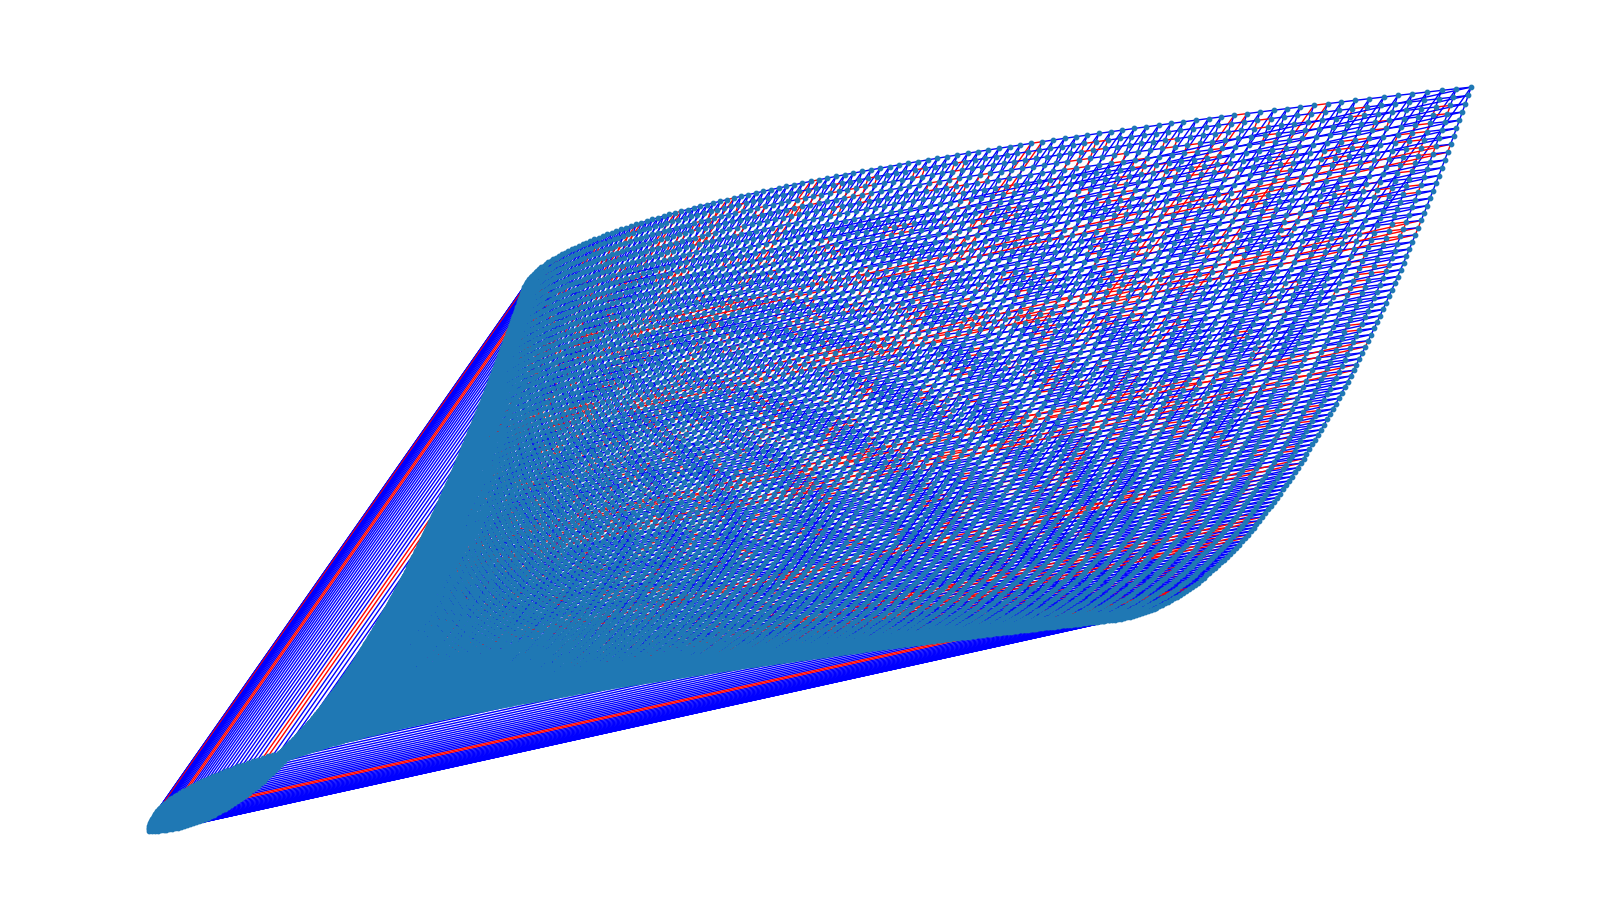

In [16]:
l = Lattice2D(128, pflip=0.1, with_positions=True)
l.flip_sel_edges(l.neg_weights_dict['randZERR']['G'])
nx.draw(l.G, pos = l.get_pos(), edge_color=l.get_edge_color(), node_size=10)
l.compute_k_eigvV()

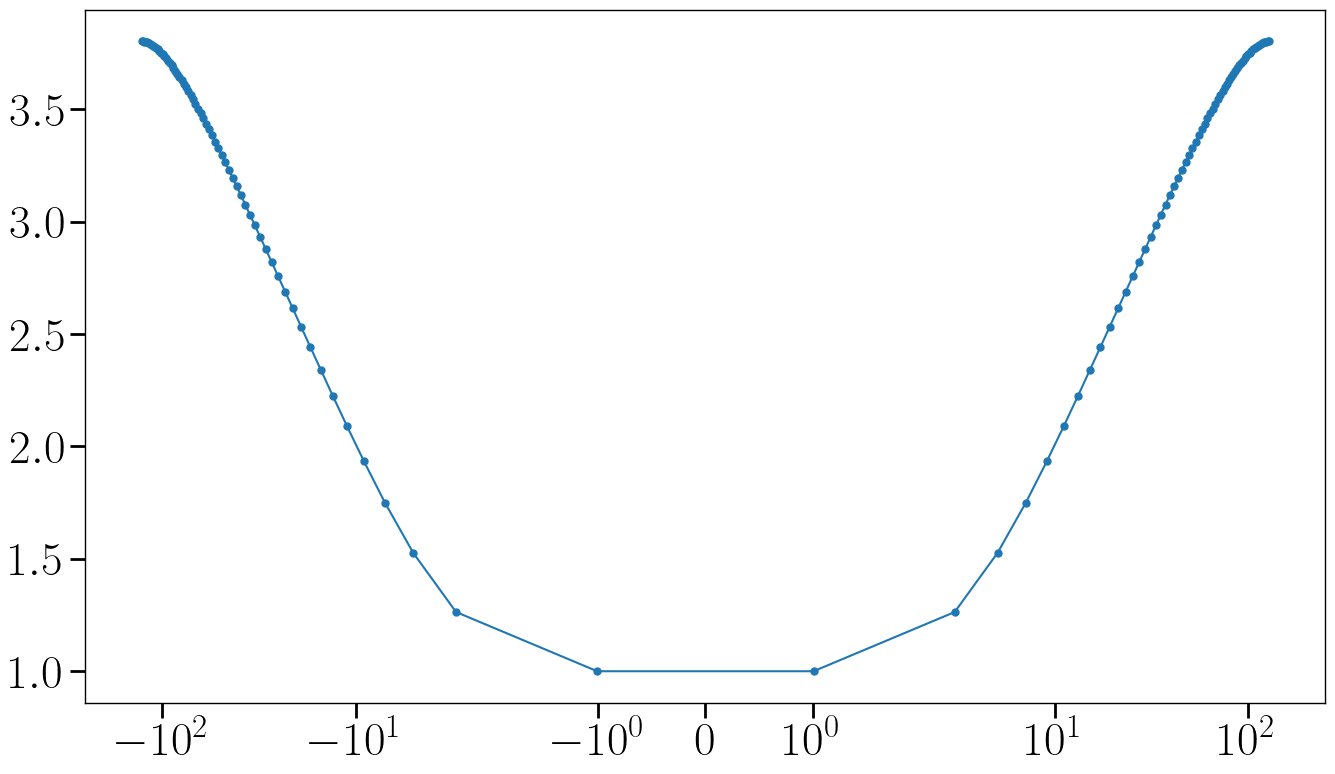

In [13]:
arr = flip_to_positive_majority(l.eigV[0].reshape(l.syshape))[64, :]
x = np.linspace(-128, 128, num=len(arr))
plt.plot(x, arr/min(arr))
plt.xscale('symlog')

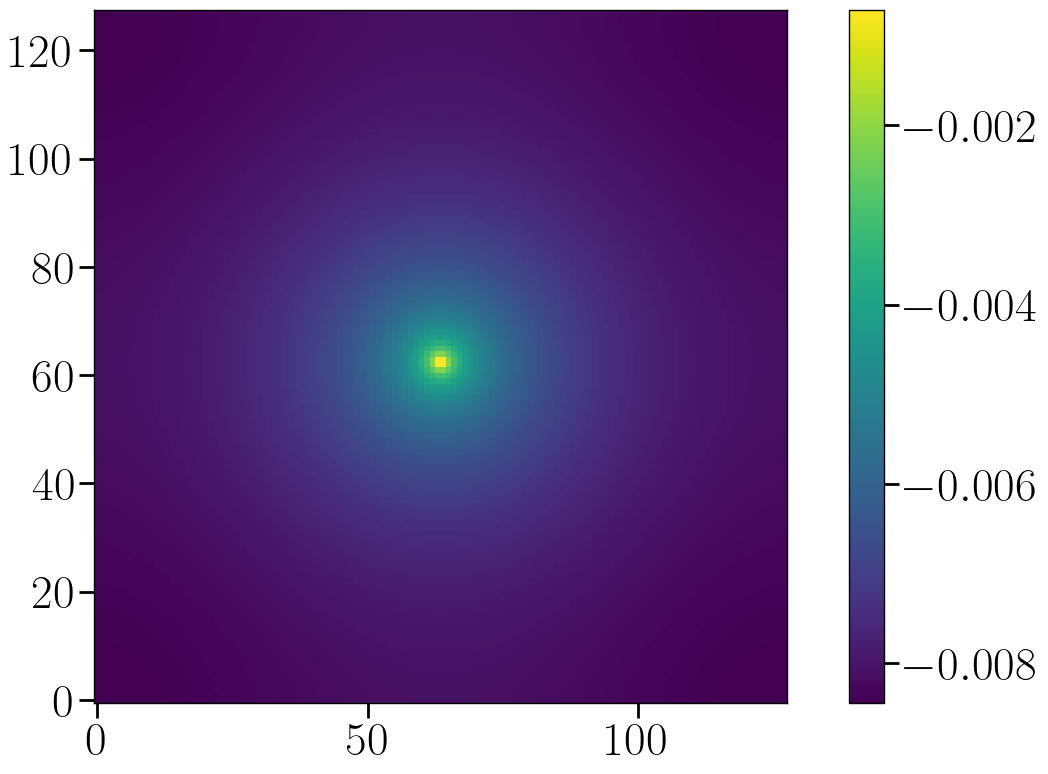

In [5]:
# plt.imshow(np.log(np.where(l.eigV[0].reshape(l.syshape) > 0, l.eigV[0].reshape(l.syshape), -l.eigV[0].reshape(l.syshape))))
plt.imshow(l.eigV[0].reshape(l.syshape))
plt.colorbar()

In [ ]:
List = 2**np.arange(4, 9)
plist = np.concatenate((np.logspace(-3, np.log10(0.05), num=5),
                        np.linspace(1e-2, 0.2, num=10),
                        np.linspace(0.2, 0.5, num=5)))
geometry_cell_dict = {'squared': ['single', 'square', 'cross'],
                      'triangular': ['single', 'triangle', 'cross'],
                      'hexagonal': ['single', 'hexagon', 'cross']}

In [ ]:
dict_max = {}
for geo, cellst in geometry_cell_dict.items():
    dict_max[geo] = {}
    for c in cellst:
        dict_max[geo][c] = {}
        for L in List:
            l = Lattice2D(L, geo=geo, sgpath="cluster_data/")
            search_dir = l.phtrapath
            output_file_name = os.path.join(search_dir, f'cat_{c}.txt')
            if not os.path.exists(output_file_name):
                print(search_dir, end='\r')
                #
                matching_files = find_matching_files(search_dir, c)
                # Concatenate the found files into the output file
                with open(output_file_name, 'w') as outfile:
                    for fname in matching_files:
                        # Construct the full path to open the file
                        file_path = os.path.join(search_dir, fname)
                        with open(file_path, 'r') as infile:
                            outfile.write(infile.read())
            print("loading ", search_dir, end='\r')
            dict_max[geo][c][L] = np.loadtxt(output_file_name, delimiter=',')
                        # Optionally, write a newline character between files

In [ ]:
for geo, cellst in geometry_cell_dict.items():
    fig, ax = plt.subplots()
    for c, cc in zip(cellst, ['red', 'green', 'blue']):
        for L in list(dict_max[geo][c].keys()):
            arr = dict_max[geo][c][L]
            column_index = 5
            try:
                sorted_indices = np.argsort(arr[:, column_index])
                sorted_arr = arr[sorted_indices]
                ax.plot(sorted_arr[:, 5], sorted_arr[:, 1], 'o-', c=cc, ms=10)
            except IndexError:
                pass